# Dependencies

In [3]:
! pip install stringdb
! pip install networkx

  Using cached stringdb-0.1.5-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached stringdb-0.1.5-py2.py3-none-any.whl (5.2 kB)


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import stringdb
import numpy as np
import seaborn as sns

# STRINGdb evaluations and network metrics

We are going to render the top-20 most predictive drivers for severe COVID-19 from each experiment (APNet and benchmarking) in STRINGdb to assess the biological credibility of the prioritisation based on SHAP values.

/usr/local/lib/python3.10/dist-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))
/usr/local/lib/python3.10/dist-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))
<ipython-input-5-1b5b061bcafa>:169: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
<ipython-input-5-1b5b061bcafa>:190: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
<ipython-input-5-1b5b061bcafa>:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)
<ipython-input-5-1b5b061bcafa>:270: UserWarning: FixedFormatter should only be used together with FixedLocator
  

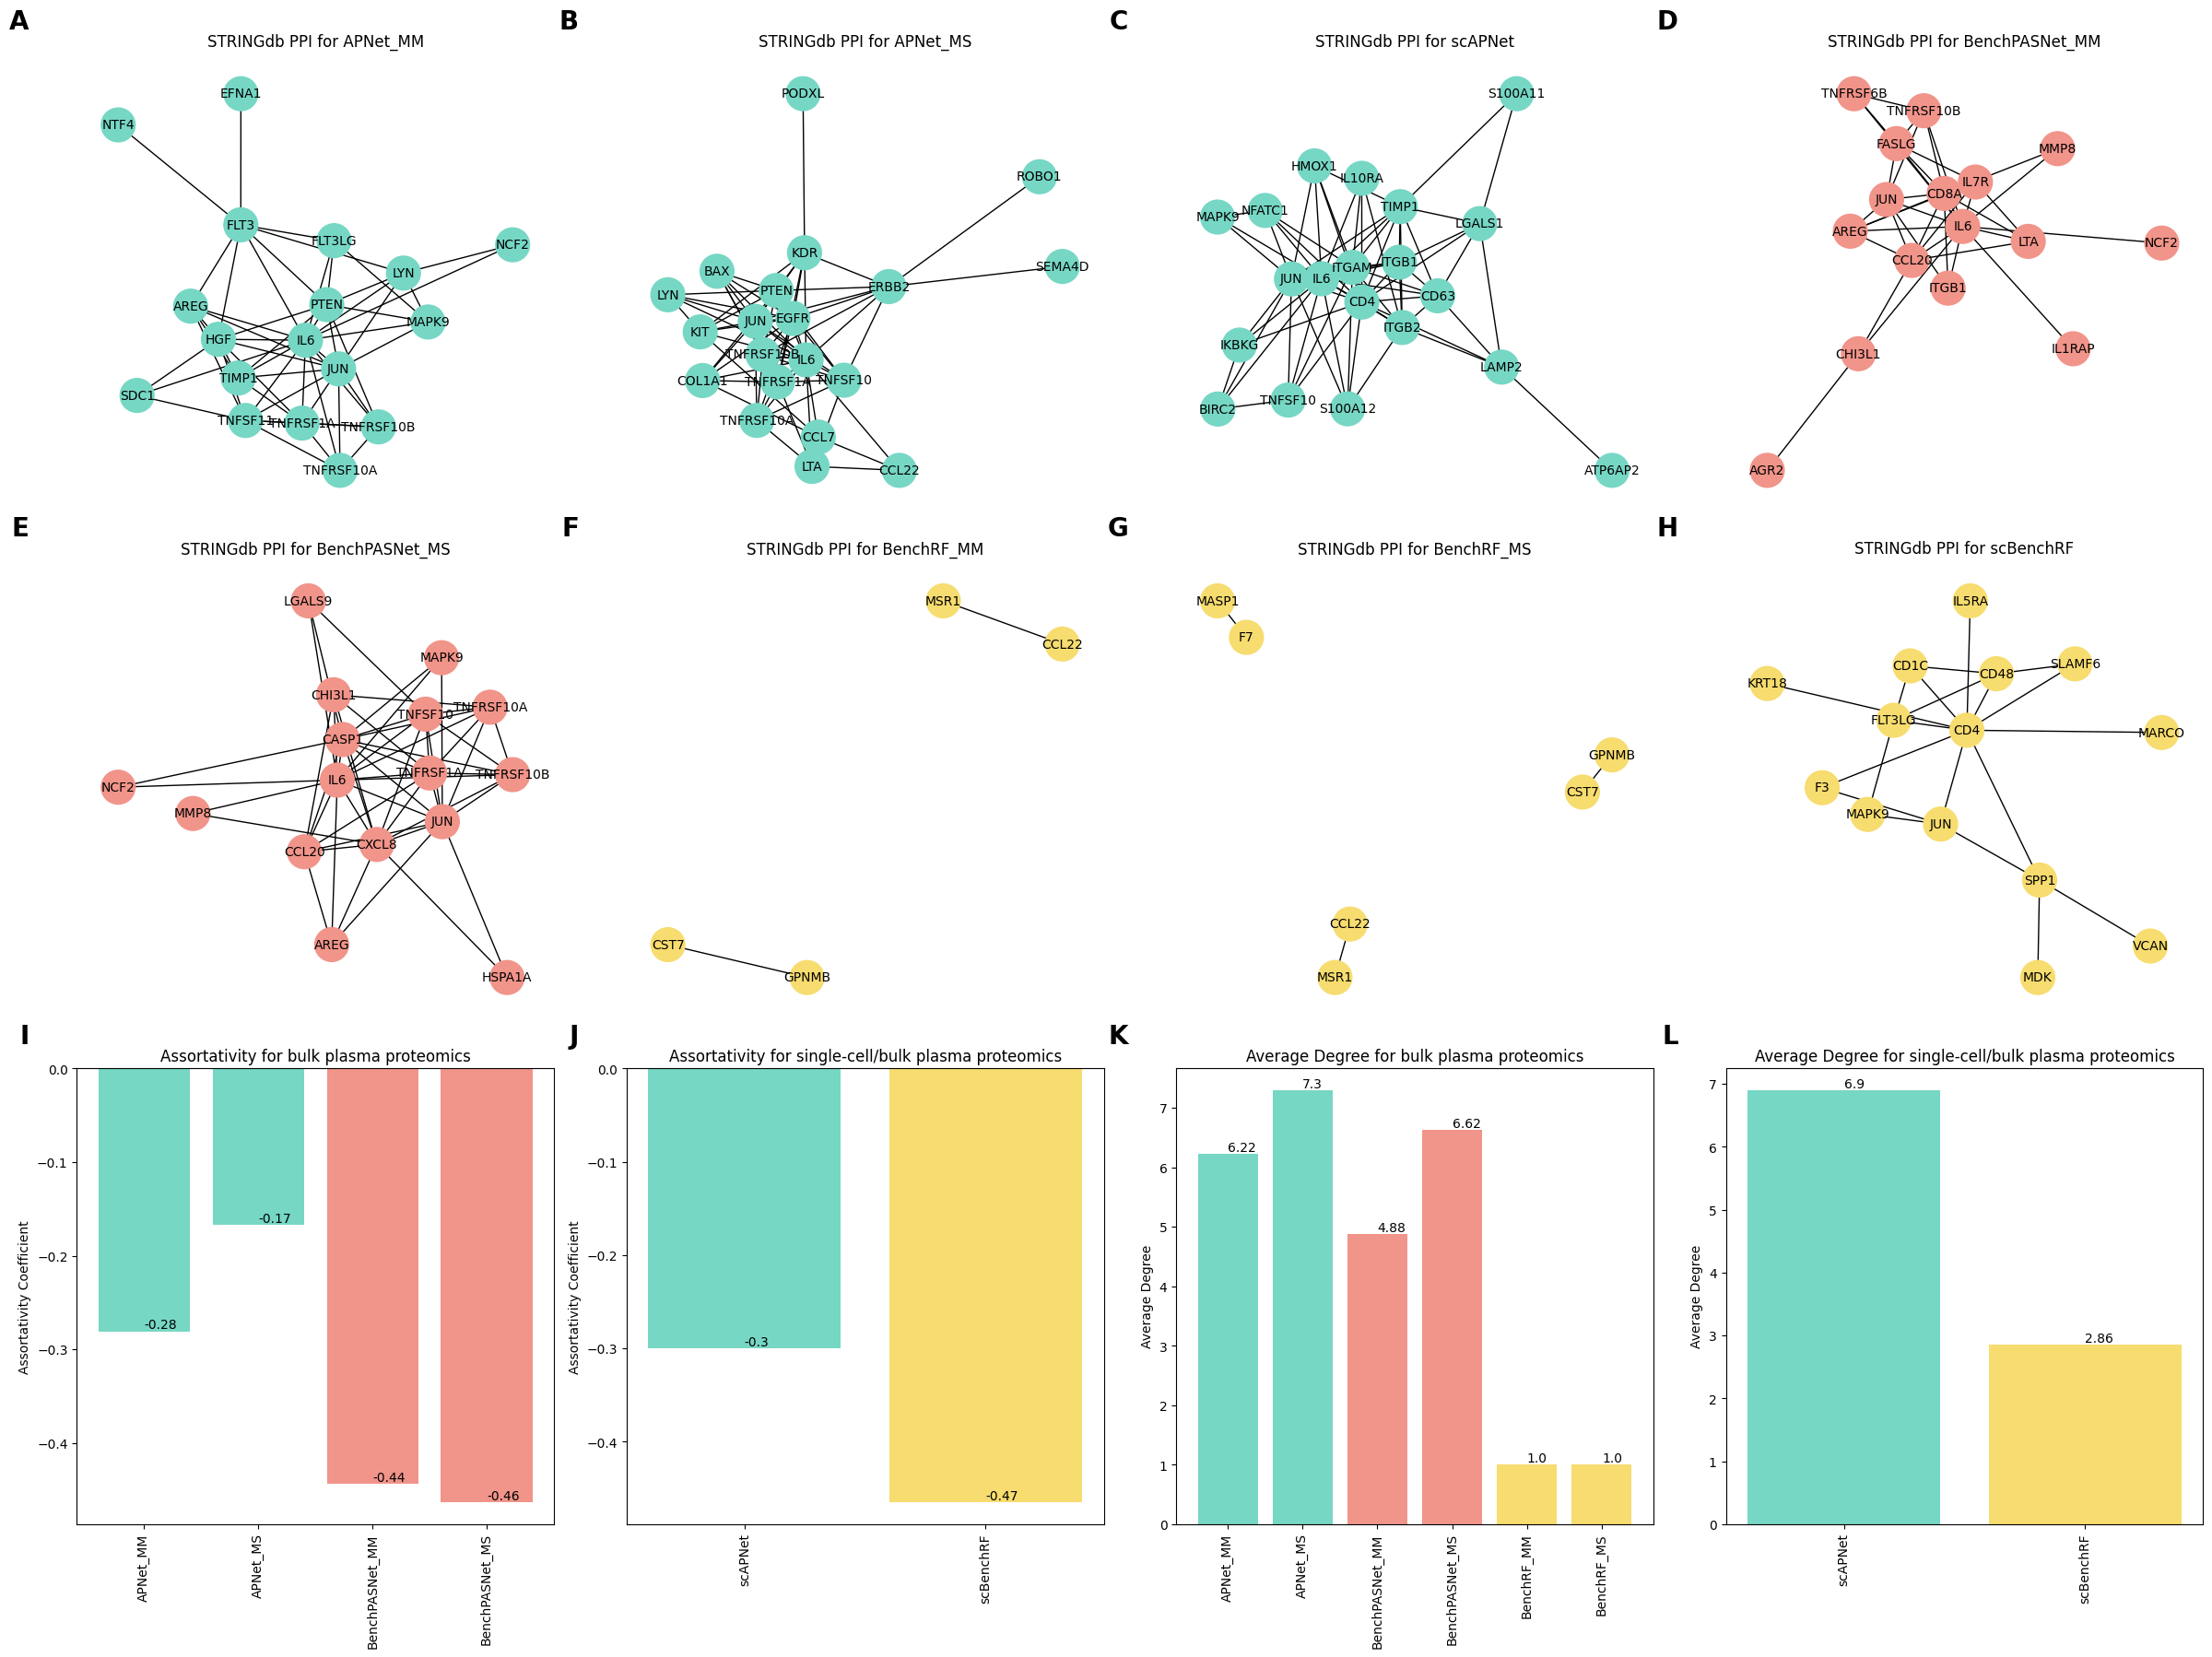

In [5]:
# Define the new colors for different SHAP groups
colors = {
    'group1': '#76D7C4',  # Light Teal for SHAP 1-3
    'group2': '#F1948A',  # Light Red for SHAP 4-5
    'group3': '#F7DC6F'   # Light Yellow for SHAP 6-8
}

# Define the sets of proteins with their corresponding groups
shap_protein_sets = {
    'APNet_MM': [
        'JUN', 'IL6', 'MAPK9', 'LYN', 'TNFRSF1A', 'AREG', 'NTF4', 'NCF2',
        'TNFRSF10A', 'HGF', 'FLT3', 'CKAP4', 'FLT3LG', 'SDC1', 'EFNA1',
        'TNFRSF10B', 'TNFSF11', 'ACAA1', 'TIMP1', 'PTEN'
    ],
    'APNet_MS': [
        'PTEN', 'JUN', 'IL6', 'LYN', 'TNFRSF1A', 'TNFRSF10A', 'TNFRSF10B', 'TNFSF10',
        'BAX', 'LTA', 'KDR', 'COL1A1', 'CCL7', 'EGFR', 'ERBB2', 'CCL22', 'PODXL',
        'SEMA4D', 'KIT', 'ROBO1'
    ],
    'scAPNet': [
        'MAPK9', 'TIMP1', 'JUN', 'IL6', 'TNFSF10',
        'S100A11', 'CD63', 'LAMP2', 'BIRC2', 'HMOX1',
        'LGALS1', 'NFATC1', 'IL10RA', 'ATP6AP2', 'CD4', 'ITGB1', 'ITGB2', 'IKBKG', 'ITGAM', 'S100A12'
    ],
    'BenchPASNet_MM': [
        'IL6', 'NCF2', 'CCL20', 'DPY30', 'CHI3L1', 'TNFRSF10B',
        'POLR2F', 'AREG', 'CKAP4', 'IL7R', 'MMP8', 'DCTN2', 'TNFRSF6B',
        'LTA', 'FASLG', 'IL1RAP', 'JUN', 'ITGB1',
        'CD8A', 'AGR2'
    ],
    'BenchPASNet_MS': [
        'IL6', 'NCF2', 'DPY30', 'CHI3L1', 'TNFRSF10B',
        'POLR2F', 'AREG', 'CKAP4', 'MMP8',
        'JUN', 'CCL20',
        'CXCL8', 'HSPA1A', 'TNFRSF1A', 'MAPK9', 'LGALS9', 'TNFRSF10A', 'CASP1', 'CLEC5A', 'TNFSF10'
    ],
    'BenchRF_MM': [
        'POLR2F', 'CCL22', 'DDAH1',
        'FKBP5', 'MSR1', 'SERPINB8',
        'NCF2', 'KRT18', 'MAPK9', 'MASP1',
        'LBR', 'FMNL1', 'GPNMB', 'CST7', 'KLK8',
        'GFRA2', 'CD207', 'ICOSLG', 'ASAH2', 'TNFSF10'
    ],
    'BenchRF_MS': [
        'POLR2F', 'CCL22', 'DDAH1',
        'FKBP5', 'MSR1', 'SERPINB8',
        'NCF2', 'KRT18', 'MAPK9', 'MASP1',
        'LBR', 'FMNL1', 'GPNMB', 'CST7', 'KLK8',
        'GFRA2', 'CD207', 'ICOSLG', 'ASAH2', 'F7'
    ],
    'scBenchRF': [
        'KRT18', 'F3', 'FLT3LG', 'BAG3', 'CD48', 'ATP6AP2', 'S100A11', 'SLAMF6',
        'MARCO', 'JUN', 'VCAN', 'IL5RA', 'CD1C', 'NCF2', 'SPP1', 'CD4', 'ENAH',
        'MDK', 'FEN1', 'MAPK9'
    ]
}

# Assign each SHAP set to a group
shap_groups = {
    'APNet_MM': 'group1',
    'APNet_MS': 'group1',
    'scAPNet': 'group1',
    'BenchPASNet_MM': 'group2',
    'BenchPASNet_MS': 'group2',
    'BenchRF_MM': 'group3',
    'BenchRF_MS': 'group3',
    'scBenchRF': 'group3'
}

# Create a figure for the STRING networks in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18))

# Iterate through each set of SHAP proteins
for idx, (shap_name, proteins) in enumerate(shap_protein_sets.items()):
    # Get the STRING IDs for the proteins
    string_ids = stringdb.get_string_ids(proteins)

    # Get the network data for the STRING IDs with a required score of 400
    network_df = stringdb.get_network(string_ids.queryItem, required_score=400)

    # Create a new graph
    STRING = nx.Graph()

    for index, row in network_df.iterrows():
        STRING.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

    for node in STRING.nodes():
        if node in proteins:
            STRING.nodes[node]['shap'] = 'yes'
        else:
            STRING.nodes[node]['shap'] = 'no'

    # Determine node colors based on the SHAP group
    group_color = colors[shap_groups[shap_name]]
    node_colors = [group_color if data.get('shap', 'yes') == 'yes' else '#ff7f0e' for _, data in STRING.nodes(data=True)]

    # Draw the graph in the 3x4 grid
    row, col = divmod(idx, 4)
    pos = nx.spring_layout(STRING)  # positions for all nodes
    ax = axes[row, col]  # Select the subplot axis
    nx.draw(STRING, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=10, ax=ax)

    ax.set_title(f'STRINGdb PPI for {shap_name}')

    # Add subplot indicators
    ax.text(-0.1, 1.1, chr(65 + idx), transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')

# Calculate assortativity coefficients
assortativity_coefficients = []

# Iterate through each set of SHAP proteins to calculate network metrics
for shap_name, proteins in shap_protein_sets.items():
    # Get the STRING IDs for the proteins
    string_ids = stringdb.get_string_ids(proteins)

    # Default STRINGdb score > 0.400
    network_df = stringdb.get_network(string_ids.queryItem, required_score=400)

    # Create a new graph
    STRING = nx.Graph()

    # Add edges to the graph from the DataFrame
    for index, row in network_df.iterrows():
        STRING.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

    # Set the 'shap' attribute for the nodes
    for node in STRING.nodes():
        if node in proteins:
            STRING.nodes[node]['shap'] = 'yes'
        else:
            STRING.nodes[node]['shap'] = 'no'

    # Calculate assortativity coefficient
    try:
        assortativity_coefficient = nx.degree_assortativity_coefficient(STRING)
    except ZeroDivisionError:
        assortativity_coefficient = float('nan')
    assortativity_coefficients.append((shap_name, assortativity_coefficient))

# Filter the data for the specified groups
assortativity_data_group1 = [item for item in assortativity_coefficients if item[0] in ['APNet_MM', 'APNet_MS']]
assortativity_data_group2 = [item for item in assortativity_coefficients if item[0] in ['BenchPASNet_MM', 'BenchPASNet_MS']]
assortativity_data_group3 = [item for item in assortativity_coefficients if item[0] in ['BenchRF_MS']]
assortativity_data_group4 = [item for item in assortativity_coefficients if item[0] in ['scAPNet', 'scBenchRF']]

# Combine the data for the common plot
assortativity_data_combined = assortativity_data_group1 + assortativity_data_group2 + assortativity_data_group3

# Create a bar plot for assortativity for APNet_MM, APNet_MS, BenchPASNet_MM, BenchPASNet_MS, and BenchRF_MS
labels, values = zip(*assortativity_data_combined)
colors_combined = [colors[shap_groups[label]] for label in labels]

ax = axes[2, 0]
bars = ax.bar(labels, values, color=colors_combined)
ax.set_title('Assortativity for bulk plasma proteomics')
ax.set_ylabel('Assortativity Coefficient')
ax.grid(False)  # Remove grid


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment


ax.set_xticklabels(labels, rotation=90)


ax.text(-0.1, 1.1, 'I', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Create a single bar plot for assortativity for scAPNet and scBenchRF
labels, values = zip(*assortativity_data_group4)
colors_group4 = [colors[shap_groups[label]] for label in labels]

ax = axes[2, 1]
bars = ax.bar(labels, values, color=colors_group4)  # Make bars slimmer
ax.set_title('Assortativity for single-cell/bulk plasma proteomics')
ax.set_ylabel('Assortativity Coefficient')
ax.grid(False)  # Remove grid

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# Rotate x-axis labels
ax.set_xticklabels(labels, rotation=90)


ax.text(-0.1, 1.1, 'J', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Define storage for average degree
average_degrees = []

# Iterate through each set of SHAP proteins to calculate network metrics
for shap_name, proteins in shap_protein_sets.items():
    # Get the STRING IDs for the proteins
    string_ids = stringdb.get_string_ids(proteins)

    # Get the network data for the STRING IDs with a required score of 400
    network_df = stringdb.get_network(string_ids.queryItem, required_score=400)

    # Create a new graph
    STRING = nx.Graph()

    # Add edges to the graph from the DataFrame
    for index, row in network_df.iterrows():
        STRING.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

    # Set the 'shap' attribute for the nodes
    for node in STRING.nodes():
        if node in proteins:
            STRING.nodes[node]['shap'] = 'yes'
        else:
            STRING.nodes[node]['shap'] = 'no'

    # Calculate average degree
    average_degree = sum(dict(STRING.degree()).values()) / len(STRING)
    average_degrees.append((shap_name, average_degree))

# Filter the data for the specified groups
average_degree_data_group1 = [item for item in average_degrees if item[0] in ['APNet_MM', 'APNet_MS']]
average_degree_data_group2 = [item for item in average_degrees if item[0] in ['BenchPASNet_MM', 'BenchPASNet_MS']]
average_degree_data_group3 = [item for item in average_degrees if item[0] in ['BenchRF_MM', 'BenchRF_MS']]
average_degree_data_group4 = [item for item in average_degrees if item[0] in ['scAPNet', 'scBenchRF']]

# Combine the data for the common plot
average_degree_data_combined = average_degree_data_group1 + average_degree_data_group2 + average_degree_data_group3

# Create a single bar plot for average degree for APNet_MM, APNet_MS, BenchPASNet_MM, BenchPASNet_MS, BenchRF_MM, and BenchRF_MS
labels, values = zip(*average_degree_data_combined)
colors_combined = [colors[shap_groups[label]] for label in labels]

ax = axes[2, 2]
bars = ax.bar(labels, values, color=colors_combined)
ax.set_title('Average Degree for bulk plasma proteomics')
ax.set_ylabel('Average Degree')
ax.grid(False)  # Remove grid

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment


ax.set_xticklabels(labels, rotation=90)

# Add subplot indicators
ax.text(-0.1, 1.1, 'K', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Create a single bar plot for average degree for scAPNet and scBenchRF
labels, values = zip(*average_degree_data_group4)
colors_group4 = [colors[shap_groups[label]] for label in labels]

ax = axes[2, 3]
bars = ax.bar(labels, values, color=colors_group4)  # Make bars slimmer
ax.set_title('Average Degree for single-cell/bulk plasma proteomics')
ax.set_ylabel('Average Degree')
ax.grid(False)  # Remove grid

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment


ax.set_xticklabels(labels, rotation=90)

# Add subplot indicators
ax.text(-0.1, 1.1, 'L', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Adjust layout for the STRING networks plot
plt.tight_layout()
plt.savefig('Figure_7.png', format='png', dpi=300)
plt.show()

In [ ]:


# Define the sets of proteins with their corresponding groups
shap_protein_sets = {
    'SHAP_1': ['JUN', 'IL6', 'MAPK9', 'LYN', 'TNFRSF1A', 'AREG', 'NTF4', 'NCF2',
               'TNFRSF10A', 'HGF', 'FLT3', 'CKAP4', 'FLT3LG', 'SDC1', 'EFNA1',
               'TNFRSF10B', 'TNFSF11', 'ACAA1', 'TIMP1', 'PTEN'],
    'SHAP_2': ['PTEN', 'JUN', 'IL6', 'LYN', 'TNFRSF1A', 'TNFRSF10A', 'TNFRSF10B', 'TNFSF10',
               'BAX', 'LTA', 'KDR', 'COL1A1', 'CCL7', 'EGFR', 'ERBB2', 'CCL22', 'PODXL',
               'SEMA4D', 'KIT', 'ROBO1'],
    'SHAP_3': ['MAPK9', 'TIMP1', 'JUN', 'IL6', 'TNFSF10',
            'S100A11', 'CD63', 'LAMP2', 'BIRC2', 'HMOX1',
            'LGALS1', 'NFATC1', 'IL10RA', 'ATP6AP2', 'CD4', 'ITGB1', 'ITGB2', 'IKBKG', 'ITGAM', 'S100A12'],
    'SHAP_4': ['IL6', 'NCF2', 'CCL20', 'DPY30', 'CHI3L1', 'TNFRSF10B', 'POLR2F', 'AREG',
               'CKAP4', 'IL7R', 'MMP8', 'DCTN2', 'TNFRSF6B', 'LTA', 'FASLG', 'IL1RAP',
               'JUN', 'ITGB1', 'CD8A', 'AGR2'],
    'SHAP_5': ['IL6', 'NCF2', 'DPY30', 'CHI3L1', 'TNFRSF10B', 'POLR2F', 'AREG', 'CKAP4',
               'MMP8', 'JUN', 'CCL20', 'CXCL8', 'HSPA1A', 'TNFRSF1A', 'MAPK9', 'LGALS9',
               'TNFRSF10A', 'CASP1', 'CLEC5A', 'TNFSF10'],
    'SHAP_6': ['POLR2F', 'CCL22', 'DDAH1', 'FKBP5', 'MSR1', 'SERPINB8', 'NCF2', 'KRT18',
               'MAPK9', 'MASP1', 'LBR', 'FMNL1', 'GPNMB', 'CST7', 'KLK8', 'GFRA2',
               'CD207', 'ICOSLG', 'ASAH2', 'TNFSF10'],
    'SHAP_7': ['POLR2F', 'CCL22', 'DDAH1', 'FKBP5', 'MSR1', 'SERPINB8', 'NCF2', 'KRT18',
               'MAPK9', 'MASP1', 'LBR', 'FMNL1', 'GPNMB', 'CST7', 'KLK8', 'GFRA2',
               'CD207', 'ICOSLG', 'ASAH2', 'F7'],
    'SHAP_8': ['KRT18', 'F3', 'FLT3LG', 'BAG3', 'CD48', 'ATP6AP2', 'S100A11', 'SLAMF6',
               'MARCO', 'JUN', 'VCAN', 'IL5RA', 'CD1C', 'NCF2', 'SPP1', 'CD4', 'ENAH',
               'MDK', 'FEN1', 'MAPK9']
}

# Define colors for groups
colors = {
    'group1': '#76D7C4',  # Light Teal for SHAP 1-3
    'group2': '#F1948A',  # Light Red for SHAP 4-5
    'group3': '#F7DC6F'   # Light Yellow for SHAP 6-8
}

# Create a figure for the distributions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Fixed threshold for high weight
fixed_threshold = 0.8

# Dictionary to store the number of high-weight edges for each SHAP set
high_weight_edges_count = {}

# Iterate through each set of SHAP proteins
for idx, (shap_name, proteins) in enumerate(shap_protein_sets.items()):
    # Get the STRING IDs for the proteins
    string_ids = stringdb.get_string_ids(proteins)

    # Get the network data for the STRING IDs with a required score of 400
    network_df = stringdb.get_network(string_ids.queryItem, required_score=400)

    # Create a new graph
    STRING = nx.Graph()

    # Add edges to the graph from the DataFrame
    for index, row in network_df.iterrows():
        STRING.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

    # Extract the weights
    weights = [d['weight'] for (u, v, d) in STRING.edges(data=True)]

    # Count the number of edges with weight above the fixed threshold
    high_weight_count = sum(1 for w in weights if w > fixed_threshold)
    high_weight_edges_count[shap_name] = high_weight_count

    # Determine the color based on the group
    if shap_name in ['SHAP_1', 'SHAP_2', 'SHAP_3']:
        color = colors['group1']
    elif shap_name in ['SHAP_4', 'SHAP_5']:
        color = colors['group2']
    else:
        color = colors['group3']

    # Plot the weight distribution
    row, col = divmod(idx, 4)
    ax = axes[row, col]  # Select the subplot axis
    sns.histplot(weights, bins=30, kde=True, ax=ax, color=color)
    ax.axvline(fixed_threshold, color='r', linestyle='--', label=f'Threshold: {fixed_threshold}')
    ax.set_title(f'Weight Distribution for {shap_name} (Edges > {fixed_threshold}: {high_weight_count})')
    ax.set_xlabel('Edge Weight')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout for the weight distributions plot
plt.tight_layout()
plt.savefig('STRINGdb_benchmarking.png', format='png', dpi=300)
plt.show()

# Identify the SHAP set with the highest number of high-weight edges
max_high_weight_shap = max(high_weight_edges_count, key=high_weight_edges_count.get)
print(f"The SHAP set with the highest number of high-weight edges is {max_high_weight_shap} with {high_weight_edges_count[max_high_weight_shap]} high-weight edges.")

APNet top predictive drivers across scenarios formulate the most interconnected STRINGdb graphs. Let's inspect which STRINGdb graphs have the highest number of highly biologically credible connections (STRINGdb score > 0.8)

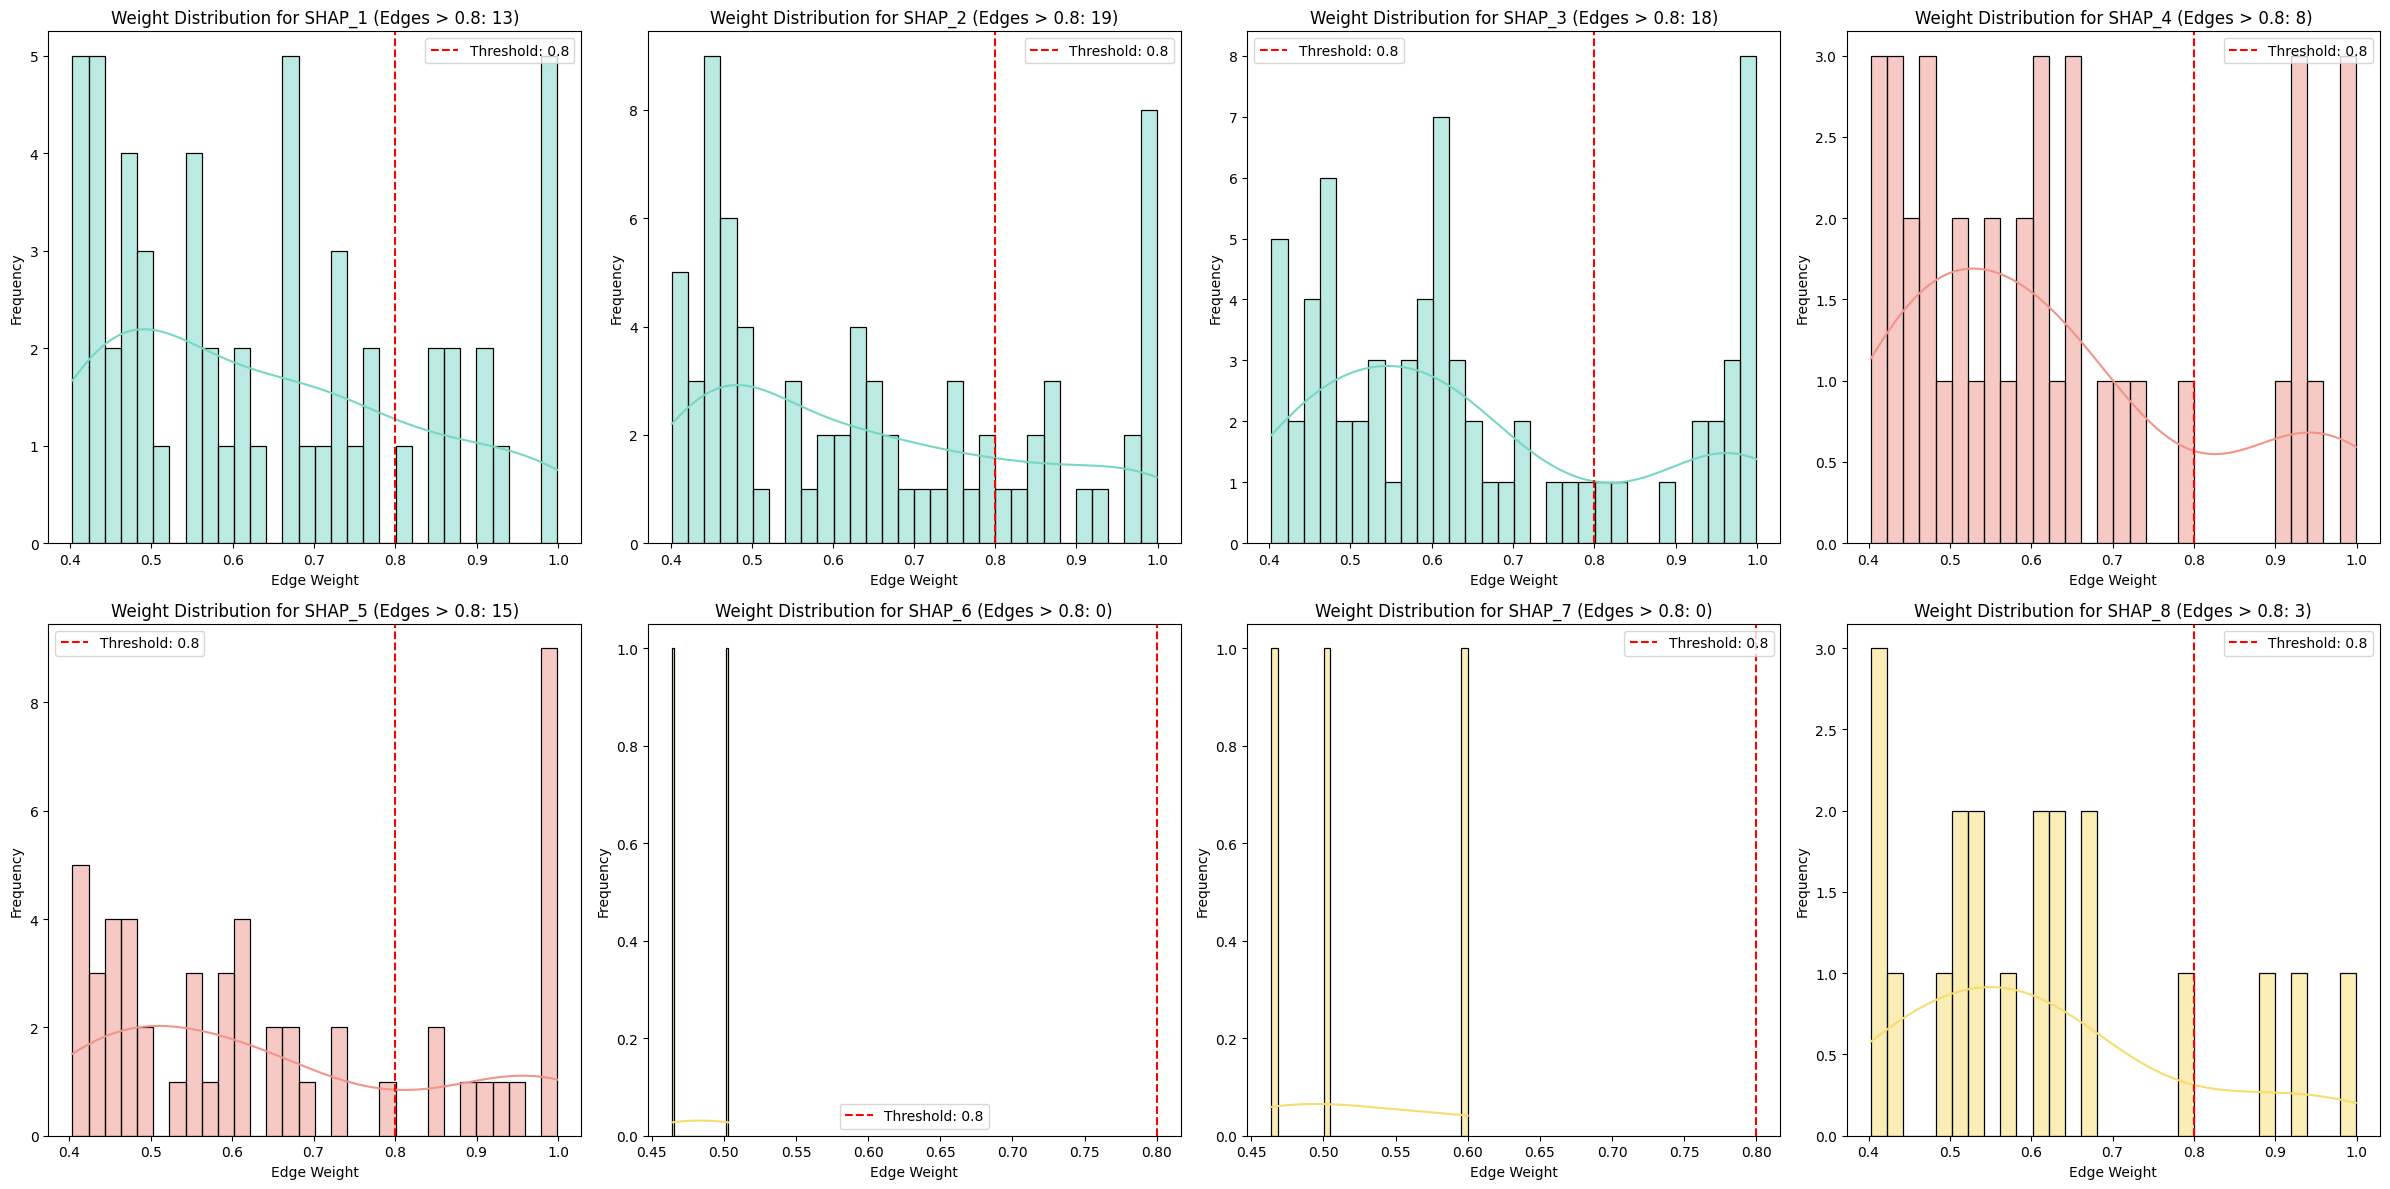

The SHAP set with the highest number of high-weight edges is SHAP_2 with 19 high-weight edges.


In [7]:
# Define the sets of proteins with their corresponding groups
shap_protein_sets = {
    'SHAP_1': ['JUN', 'IL6', 'MAPK9', 'LYN', 'TNFRSF1A', 'AREG', 'NTF4', 'NCF2',
               'TNFRSF10A', 'HGF', 'FLT3', 'CKAP4', 'FLT3LG', 'SDC1', 'EFNA1',
               'TNFRSF10B', 'TNFSF11', 'ACAA1', 'TIMP1', 'PTEN'],
    'SHAP_2': ['PTEN', 'JUN', 'IL6', 'LYN', 'TNFRSF1A', 'TNFRSF10A', 'TNFRSF10B', 'TNFSF10',
               'BAX', 'LTA', 'KDR', 'COL1A1', 'CCL7', 'EGFR', 'ERBB2', 'CCL22', 'PODXL',
               'SEMA4D', 'KIT', 'ROBO1'],
    'SHAP_3': ['MAPK9', 'TIMP1', 'JUN', 'IL6', 'TNFSF10',
            'S100A11', 'CD63', 'LAMP2', 'BIRC2', 'HMOX1',
            'LGALS1', 'NFATC1', 'IL10RA', 'ATP6AP2', 'CD4', 'ITGB1', 'ITGB2', 'IKBKG', 'ITGAM', 'S100A12'],
    'SHAP_4': ['IL6', 'NCF2', 'CCL20', 'DPY30', 'CHI3L1', 'TNFRSF10B', 'POLR2F', 'AREG',
               'CKAP4', 'IL7R', 'MMP8', 'DCTN2', 'TNFRSF6B', 'LTA', 'FASLG', 'IL1RAP',
               'JUN', 'ITGB1', 'CD8A', 'AGR2'],
    'SHAP_5': ['IL6', 'NCF2', 'DPY30', 'CHI3L1', 'TNFRSF10B', 'POLR2F', 'AREG', 'CKAP4',
               'MMP8', 'JUN', 'CCL20', 'CXCL8', 'HSPA1A', 'TNFRSF1A', 'MAPK9', 'LGALS9',
               'TNFRSF10A', 'CASP1', 'CLEC5A', 'TNFSF10'],
    'SHAP_6': ['POLR2F', 'CCL22', 'DDAH1', 'FKBP5', 'MSR1', 'SERPINB8', 'NCF2', 'KRT18',
               'MAPK9', 'MASP1', 'LBR', 'FMNL1', 'GPNMB', 'CST7', 'KLK8', 'GFRA2',
               'CD207', 'ICOSLG', 'ASAH2', 'TNFSF10'],
    'SHAP_7': ['POLR2F', 'CCL22', 'DDAH1', 'FKBP5', 'MSR1', 'SERPINB8', 'NCF2', 'KRT18',
               'MAPK9', 'MASP1', 'LBR', 'FMNL1', 'GPNMB', 'CST7', 'KLK8', 'GFRA2',
               'CD207', 'ICOSLG', 'ASAH2', 'F7'],
    'SHAP_8': ['KRT18', 'F3', 'FLT3LG', 'BAG3', 'CD48', 'ATP6AP2', 'S100A11', 'SLAMF6',
               'MARCO', 'JUN', 'VCAN', 'IL5RA', 'CD1C', 'NCF2', 'SPP1', 'CD4', 'ENAH',
               'MDK', 'FEN1', 'MAPK9']
}

# Define colors for groups
colors = {
    'group1': '#76D7C4',  # Light Teal for SHAP 1-3
    'group2': '#F1948A',  # Light Red for SHAP 4-5
    'group3': '#F7DC6F'   # Light Yellow for SHAP 6-8
}

# Create a figure for the distributions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))

# Fixed threshold for high biological fidelity
fixed_threshold = 0.8

# Dictionary to store the number of high-weight edges for each SHAP set
high_weight_edges_count = {}

# Iterate through each set of SHAP proteins
for idx, (shap_name, proteins) in enumerate(shap_protein_sets.items()):
    # Get the STRING IDs for the proteins
    string_ids = stringdb.get_string_ids(proteins)

    # Get the network data for the STRING IDs with a required score of 400
    network_df = stringdb.get_network(string_ids.queryItem, required_score=400)

    # Create a new graph
    STRING = nx.Graph()

    # Add edges to the graph from the DataFrame
    for index, row in network_df.iterrows():
        STRING.add_edge(row['preferredName_A'], row['preferredName_B'], weight=row['score'])

    # Extract the weights
    weights = [d['weight'] for (u, v, d) in STRING.edges(data=True)]

    # Count the number of edges with weight above the fixed threshold
    high_weight_count = sum(1 for w in weights if w > fixed_threshold)
    high_weight_edges_count[shap_name] = high_weight_count

    # Determine the color based on the group
    if shap_name in ['SHAP_1', 'SHAP_2', 'SHAP_3']:
        color = colors['group1']
    elif shap_name in ['SHAP_4', 'SHAP_5']:
        color = colors['group2']
    else:
        color = colors['group3']

    # Plot the weight distribution
    row, col = divmod(idx, 4)
    ax = axes[row, col]  # Select the subplot axis
    sns.histplot(weights, bins=30, kde=True, ax=ax, color=color)
    ax.axvline(fixed_threshold, color='r', linestyle='--', label=f'Threshold: {fixed_threshold}')
    ax.set_title(f'Weight Distribution for {shap_name} (Edges > {fixed_threshold}: {high_weight_count})')
    ax.set_xlabel('Edge Weight')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout for the weight distributions plot
plt.tight_layout()
plt.savefig('STRINGdb_benchmarking.png', format='png', dpi=300)
plt.show()

# Identify the SHAP set with the highest number of high-weight edges
max_high_weight_shap = max(high_weight_edges_count, key=high_weight_edges_count.get)
print(f"The SHAP set with the highest number of high-weight edges is {max_high_weight_shap} with {high_weight_edges_count[max_high_weight_shap]} high-weight edges.")